In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_probability as tfp

tfb = tfp.bijectors
tfd = tfp.distributions
tfpl = tfp.layers

print("Tensorflow Version: ", tf.__version__)
print("Tensorflow Probability Version: ", tfp.__version__)

Tensorflow Version:  2.3.0
Tensorflow Probability Version:  0.11.0


Load and visualize raw dataset.

In [143]:
raw_data = pd.read_csv('collision_dataset.txt')
atom = r"$H_2$"

C:\Users\20191165\AppData\Local\Temp\ipykernel_32232\3997776172.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,3,1)


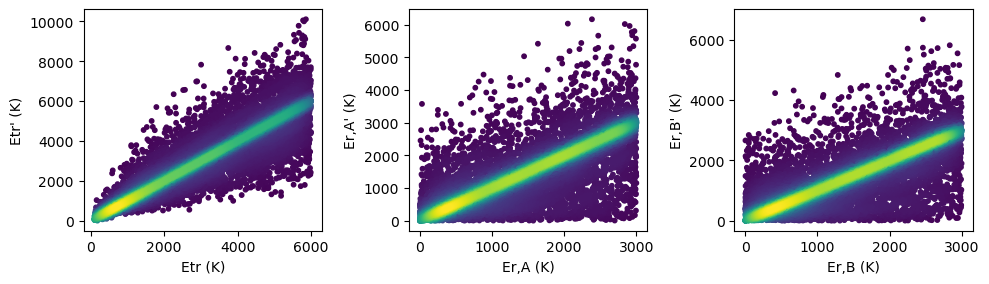

In [144]:


def dscatter(x,y):
    xy = np.vstack([x,y])
    z = gaussian_kde(xy)(xy)
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]
    plt.scatter(x,y,c=z, s=10)

plt.figure(figsize=[10,3])
plt.title('Scattering kernels')

plt.subplot(1,3,1)
plt.xlabel("Etr (K)")
plt.ylabel("Etr' (K)")
dscatter(raw_data['Etr'],raw_data['Etrp'])


plt.subplot(1,3,2)
plt.xlabel("Er,A (K)")
plt.ylabel("Er,A' (K)")
dscatter(raw_data['Er1'],raw_data['Er1p'])


plt.subplot(1,3,3)
plt.xlabel("Er,B (K)")
plt.ylabel("Er,B' (K)")
dscatter(raw_data['Er2'],raw_data['Er2p'])
plt.tight_layout()
plt.show()

Code to obtain figure 3.10.

In [188]:
def figure310(x, y, ax, xlims=None, ylims=None):
    from scipy.stats import gaussian_kde
    # kernel density estimate
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # sort by density for nicer visualization
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # convert to reduced units
    k_b = 1.380649e-23  # [J/K]
    # x = x / k_b
    # y = y / k_b

    # scatter plot
    sc = ax.scatter(x, y, c=z, s=2)
    ax.plot(xlims, xlims, 'r--', alpha=0.75, zorder=10)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_box_aspect(1)

    return sc

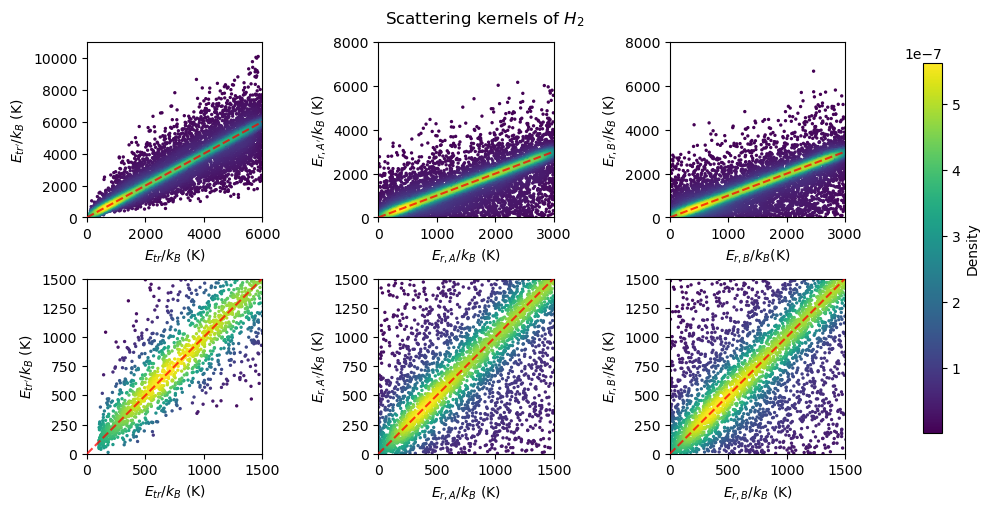

In [190]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 3, figsize=(10, 5), dpi=100, layout = 'constrained')
fig.suptitle('Scattering kernels of '+ atom)

xlims = [0, 6000]
ylims = [0, 11000]
figure310(raw_data['Etr'], raw_data['Etrp'], ax=axes[0, 0], xlims= xlims, ylims=ylims)  # scatter plot
axes[0, 0].set_xlabel(r"$E_{tr}$/$k_B$ (K)")
axes[0, 0].set_ylabel(r"$E_{tr'}$/$k_B$ (K)")

xlims = [0, 3000]
ylims = [0, 8000]
figure310(raw_data['Er1'],raw_data['Er1p'], ax=axes[0, 1],xlims = xlims, ylims = ylims)  # scatter plot
axes[0, 1].set_xlabel(r"$E_{r,A}$/$k_B$ (K)")
axes[0, 1].set_ylabel(r"$E_{r,A'}$/$k_B$ (K)")

xlims = [0, 3000]
ylims = [0, 8000]
figure310(raw_data['Er2'],raw_data['Er2p'], ax=axes[0, 2], xlims = xlims, ylims = ylims)  # scatter plot
axes[0, 2].set_xlabel(r"$E_{r,B}$/$k_B$(K)")
axes[0, 2].set_ylabel(r"$E_{r,B'}$/$k_B$ (K)")

lims = [0, 1500]
figure310(raw_data['Etr'],raw_data['Etrp'], ax=axes[1, 0], xlims = lims, ylims =lims)  # scatter plot
axes[1, 0].set_xlabel(r"$E_{tr}$/$k_B$ (K)")
axes[1, 0].set_ylabel(r"$E_{tr'}$/$k_B$ (K)")

sc = figure310(raw_data['Er1'],raw_data['Er1p'], ax=axes[1, 1], xlims = lims, ylims = lims)  # scatter plot
axes[1, 1].set_xlabel(r"$E_{r,A}$/$k_B$ (K)")
axes[1, 1].set_ylabel(r"$E_{r,A'}$/$k_B$ (K)")

figure310(raw_data['Er2'],raw_data['Er2p'], ax=axes[1, 2], xlims = lims, ylims = lims)  # scatter plot
axes[1, 2].set_xlabel(r"$E_{r,B}$/$k_B$ (K)")
axes[1, 2].set_ylabel(r"$E_{r,B'}$/$k_B$ (K)")

cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), shrink=0.9, label="Density", location= "right")
plt.show()

Code to obtain figure 3.11.

In [191]:
def figure311(x, y, ax, xlims=None, ylims=None):
    from scipy.stats import gaussian_kde
    # kernel density estimate
    xy = np.vstack([x, y])
    z = gaussian_kde(xy)(xy)

    # sort by density for nicer visualization
    idx = z.argsort()
    x, y, z = x[idx], y[idx], z[idx]

    # convert to reduced units
    k_b = 1.380649e-23  # [J/K]
    # x = x / k_b
    # y = y / k_b

    # scatter plot
    sc = ax.scatter(x, y, c=z, s=2)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    ax.set_box_aspect(1)

    return sc

Postprocess variables to obtain the total energy and relative energies.

In [149]:
raw_data = raw_data.assign(Ec = raw_data["Etr"] + raw_data["Er1"] + raw_data["Er2"])
raw_data = raw_data.assign(epst = raw_data["Etr"]/raw_data["Ec"])
raw_data = raw_data.assign(epsr = raw_data["Er1"]/(raw_data["Er1"] + raw_data["Er2"]))

raw_data = raw_data.assign(Ecp = raw_data["Etrp"] + raw_data["Er1p"] + raw_data["Er2p"])
raw_data = raw_data.assign(epstp = raw_data["Etrp"]/raw_data["Ecp"])
raw_data = raw_data.assign(epsrp = raw_data["Er1p"]/(raw_data["Er1p"] + raw_data["Er2p"]))

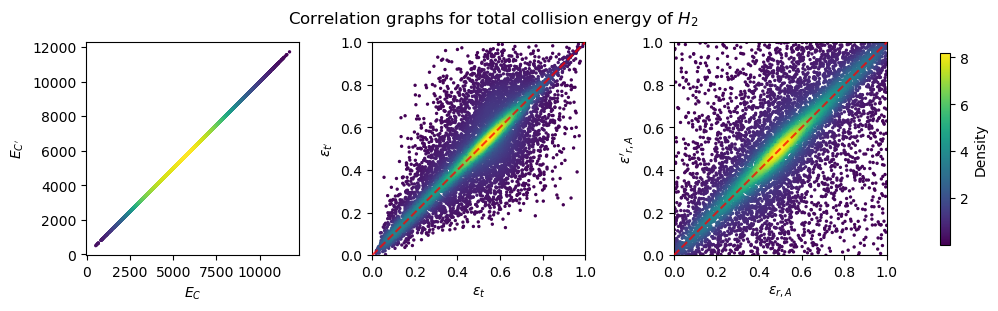

In [187]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=100, layout = 'constrained')
fig.suptitle('Correlation graphs for total collision energy of '+ atom)

xlims = [0, 11000]
ylims = [0, 11000]
figure311(raw_data['Ec'], raw_data['Ecp'], ax = axes[0])  # scatter plot
axes[0].set_xlabel(r"$E_C$")
axes[0].set_ylabel(r"$E_{C'}$")

lims = [0, 1]
figure311(raw_data['epst'],raw_data['epstp'], ax=axes[1],xlims = lims, ylims = lims)  # scatter plot
axes[1].set_xlabel(r"$\epsilon_t$")
axes[1].set_ylabel(r"$\epsilon_{t'}$")
axes[1].plot(xlims, xlims, 'r--', alpha=0.75, zorder=10)

sc = figure311(raw_data['epsr'],raw_data['epsrp'], ax=axes[2], xlims = lims, ylims = lims)  # scatter plot
axes[2].set_xlabel(r"$\epsilon_{r, A}$")
axes[2].set_ylabel(r"$\epsilon'_{r, A}$")
axes[2].plot(xlims, xlims, 'r--', alpha=0.75, zorder=10)

cbar = fig.colorbar(sc, ax=axes.ravel().tolist(), shrink=0.9, label="Density", location= "right")

Code to obtain figure 3.12.

In [192]:
def figure312(x, ax):
    from scipy.stats import gaussian_kde
    from scipy import stats
    # kernel density estimate
    kde = stats.gaussian_kde(x)

    # line plot
    x_eval = np.linspace(x.min(), x.max(), num=2000)
    line, = ax.plot(x_eval, kde(x_eval), linewidth = 2)
    
    ax.set_box_aspect(1)

    return line

Text(0, 0.5, "f($E_{r, B'}$/$k_B$)")

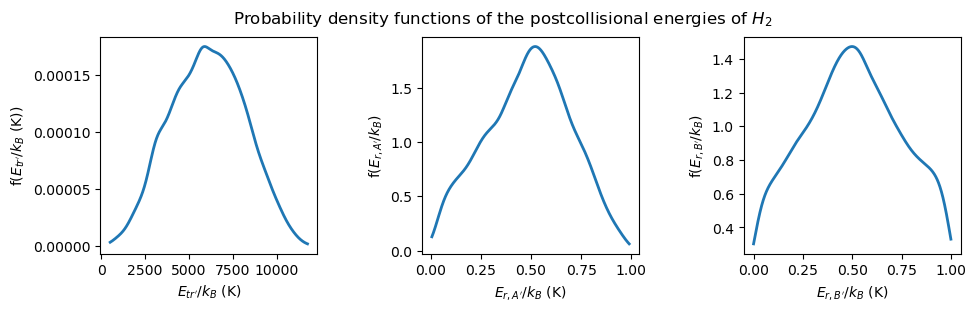

In [193]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), dpi=100, layout = 'constrained')
fig.suptitle('Probability density functions of the postcollisional energies of '+ atom)

figure312(raw_data['Ecp'], ax = axes[0])  # scatter plot
axes[0].set_xlabel(r"$E_{tr'}$/$k_B$ (K)")
axes[0].set_ylabel(r"f($E_{tr'}$/$k_B$ (K))")

figure312(raw_data['epstp'], ax=axes[1])  # scatter plot
axes[1].set_xlabel(r"$E_{r, A'}$/$k_B$ (K)")
axes[1].set_ylabel(r"f($E_{r, A'}$/$k_B$)")

sc = figure312(raw_data['epsrp'], ax=axes[2])  # scatter plot
axes[2].set_xlabel(r"$E_{r, B'}$/$k_B$ (K)")
axes[2].set_ylabel(r"f($E_{r, B'}$/$k_B$)")
